<a href="https://colab.research.google.com/github/nchelaru/knn_notes/blob/master/knn_classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This is taken from Introduction to Machine Learning with Python (2017) (pg. 35)

# Workflow

## Import libraries

In [0]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

## Import and preview data

See the [SO answer](https://stackoverflow.com/a/46623904) on how to convert a `bunch` object to a dataframe.

In [9]:
cancer = load_breast_cancer()

df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

df['target'] = cancer['target']

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

## Train-test split

According to [`scikit-learn` docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), the default train-test ratio is a 75/25 split.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
                                                      cancer.data, 
                                                      cancer.target, 
                                                      stratify=cancer.target, 
                                                      random_state=66
                                                    )

## Record model accuracy at different k values

In [0]:
## Create empty lists for training and testing scores
training_accuracy = []
test_accuracy = []

## Test model accuracies across a range of possible k values
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
  clf = KNeighborsClassifier(n_neighbors = n_neighbors)

  clf.fit(X_train, y_train)
  
  training_accuracy.append(clf.score(X_train, y_train))
  
  test_accuracy.append(clf.score(X_test, y_test))

## Plot

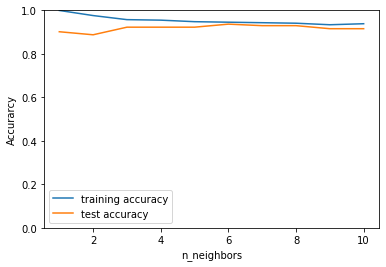

In [14]:
## Two line plots
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')

## Labels
plt.ylabel("Accurarcy")
plt.xlabel("n_neighbors")

## Adjust y-axis range
plt.ylim([0, 1])

## Add legend
plt.legend()